In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection  
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
import random
import numpy as np
import random
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: LOADING THE DATASET AND PRINTING IT

In [13]:
dataSet = pd.read_csv("data.csv")
dataSet = dataSet.drop(dataSet.columns[[12]], axis=1)
print(dataSet)

     Unnamed: 0  location  country  gender   age  vis_wuhan  from_wuhan  \
0             0       104        8       1  66.0          1           0   
1             1       101        8       0  56.0          0           1   
2             2       137        8       1  46.0          0           1   
3             3       116        8       0  60.0          1           0   
4             4       116        8       1  58.0          0           0   
..          ...       ...      ...     ...   ...        ...         ...   
858         858        48        3       2  24.0          0           0   
859         859         0        0       2  35.0          0           0   
860         860         3        1       1  49.4          0           0   
861         861        24        9       1  49.4          0           0   
862         862        15       27       1  70.0          0           0   

     symptom1  symptom2  symptom3  symptom4  symptom5  diff_sym_hos  result  
0          14        

In [14]:
one_hot_encoded_data = pd.get_dummies(dataSet, columns = ['location', 'country', 'gender', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'diff_sym_hos'])
df = pd.DataFrame(one_hot_encoded_data)
first_column = df.pop('result')
df.insert(292, 'result', first_column)
print(df)

     Unnamed: 0   age  vis_wuhan  from_wuhan  location_0  location_1  \
0             0  66.0          1           0           0           0   
1             1  56.0          0           1           0           0   
2             2  46.0          0           1           0           0   
3             3  60.0          1           0           0           0   
4             4  58.0          0           0           0           0   
..          ...   ...        ...         ...         ...         ...   
858         858  24.0          0           0           0           0   
859         859  35.0          0           0           1           0   
860         860  49.4          0           0           0           0   
861         861  49.4          0           0           0           0   
862         862  70.0          0           0           0           0   

     location_2  location_3  location_4  location_5  ...  diff_sym_hos_7  \
0             0           0           0           0  ...   

# STEP 2: SCALE THE FEATURES AND SPLIT THE DATASET INTO X & Y

In [15]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
x = scaled[0:864, 1:291]
y = scaled[0:864, 292]
print("X:", x)
print("Y:", y)

X: [[0.68085106 1.         0.         ... 0.         0.         0.        ]
 [0.57446809 0.         1.         ... 0.         0.         0.        ]
 [0.46808511 0.         1.         ... 0.         1.         0.        ]
 ...
 [0.50425532 0.         0.         ... 0.         0.         0.        ]
 [0.50425532 0.         0.         ... 0.         0.         0.        ]
 [0.72340426 0.         0.         ... 0.         0.         0.        ]]
Y: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# STEP 3: SPLIT THE DATA INTO TRAIN, VALIDATION, AND TEST

In [16]:
x_temp, xTest, y_temp, yTest = train_test_split(x,y,train_size=0.8, random_state = 5,shuffle=True)
xTrain, xValidation, yTrain, yValidation =  train_test_split(x_temp,y_temp,train_size=0.75,random_state = 5,shuffle=True)
print(len(xTrain))
print(len(xValidation))
print(len(xTest))

517
173
173


# STEP 4: TRAIN THE MODEL AND VALIDATE IT

In [17]:
modelAccuracy = [];
for i in range(1,6):
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(C=i, class_weight = 'balanced')
    # fit the model with data
    logreg.fit(xTrain,yTrain)

    #Predict the response for validation dataset
    y_pred=logreg.predict(xValidation)

    #Accuracy of Predict
    modelAccuracy.append(metrics.accuracy_score(yValidation, y_pred))
    print ("Accuracy", metrics.accuracy_score(yValidation, y_pred))


Accuracy 0.930635838150289
Accuracy 0.9364161849710982
Accuracy 0.9364161849710982
Accuracy 0.9248554913294798
Accuracy 0.9248554913294798


In [18]:
bestAccuracy = max(modelAccuracy)
optimalRegularizer = modelAccuracy.index(bestAccuracy)+1
print(optimalRegularizer)

2


In [19]:
model = LogisticRegression(C=optimalRegularizer, class_weight='balanced')
# Train the model using the training sets
model.fit(xTrain, yTrain)

#Predicted Output on Test Data
y_pred= model.predict(xValidation)       
print(y_pred)

modelAccuracy.append(metrics.accuracy_score(yValidation, y_pred))
print ("Accuracy", metrics.accuracy_score(yValidation, y_pred))

[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0.]
Accuracy 0.9364161849710982


# STEP 5: MEASURE ACCURACY ON TEST DATA

In [20]:
#Predict the response for validation dataset
y_pred=logreg.predict(xTest)

#Accuracy of Predict
print("Accuracy:",metrics.accuracy_score(yTest, y_pred))

Accuracy: 0.9421965317919075


# STEP 6: CALCULATING THE PERFORMANCE METRICS

Precision: 0.687500
Recall: 1.000000
F1 score: 0.814815
ROC AUC: 0.966887


C:\Users\UNiversal ADV\miniconda3\envs\mlpr\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


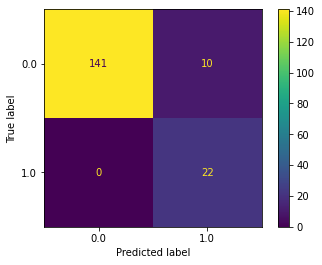

In [21]:
precision = precision_score(yTest, y_pred)
print('Precision: %f' % precision)
recall = recall_score(yTest, y_pred)
print('Recall: %f' % recall)
f1 = f1_score(yTest, y_pred)
print('F1 score: %f' % f1)
auc = roc_auc_score(yTest, y_pred)
print('ROC AUC: %f' % auc)
plot_confusion_matrix(logreg, xTest, yTest)
plt.show()

# STEP 7: GRAPHING THE ROC CURVE

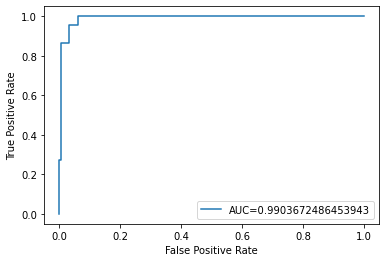

In [22]:
y_pred_proba = logreg.predict_proba(xTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(yTest,  y_pred_proba)
auc = metrics.roc_auc_score(yTest, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()